# NLP - RKD + QLORA

# Amaan Mithani Kunaal Vadgama

# Load tools

In [ ]:
pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
#%pip install "pytorch==1.10.1"
%pip install transformers datasets tensorboard --upgrade

!sudo apt-get install git-lfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

# Preprocess & load dataset

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import evaluate
import numpy as np
from transformers import AutoTokenizer

tokenizer_id = "google/bert_uncased_L-12_H-768_A-12"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)

def process(examples):
    tokenized_inputs = tokenizer(
        examples["sentence"], truncation=True, max_length=512
    )
    return tokenized_inputs

# define metrics and metrics function
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    acc = accuracy_metric.compute(predictions=predictions, references=labels)
    return {
        "accuracy": acc["accuracy"],
    }

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

def create_dataset(dataset_id, dataset_config, tokenizer_id):
  dataset = load_dataset(dataset_id,dataset_config)
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
  data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  tokenized_datasets = dataset.map(process, batched=True)
  tokenized_datasets = tokenized_datasets.rename_column("label","labels")
  tokenized_datasets["test"].features
  labels = tokenized_datasets["train"].features["labels"].names

  num_labels = len(labels)
  label2id, id2label = dict(), dict()
  for i, label in enumerate(labels):
      label2id[label] = str(i)
      id2label[str(i)] = label

  return num_labels, label2id, id2label, tokenized_datasets, data_collator

In [ ]:
dataset_id="glue"
dataset_config="sst2"
tokenizer_id = "google/bert_uncased_L-12_H-768_A-12" # Base-BERT

num_labels, label2id, id2label, tokenized_datasets, data_collator = create_dataset(dataset_id, dataset_config, tokenizer_id)

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

# Define Distillation tools

### One-Step Straightforward Distillation


In [ ]:
from transformers import TrainingArguments, Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F

class DistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)

        self.alpha = alpha
        self.temperature = temperature

class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher = teacher_model
        # place teacher on same device as student
        self._move_model_to_device(self.teacher,self.model.device)
        self.teacher.eval()

    def compute_loss(self, model, inputs, return_outputs=False):

        # compute student output
        outputs_student = model(**inputs)
        student_loss=outputs_student.loss
        # compute teacher output
        with torch.no_grad():
          outputs_teacher = self.teacher(**inputs)

        # assert size
        assert outputs_student.logits.size() == outputs_teacher.logits.size()

        # Soften probabilities and compute distillation loss
        loss_function = nn.KLDivLoss(reduction="batchmean")
        loss_logits = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        # Return weighted student loss
        loss = self.args.alpha * student_loss + (1. - self.args.alpha) * loss_logits
        return (loss, outputs_student) if return_outputs else loss

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import HfFolder

def one_step_straightforward_kd(teacher_id, student_id, repo_name='trash', tokenizer= tokenizer,
                                num_labels=num_labels, id2label=id2label, label2id=label2id,
                                tokenized_datasets=tokenized_datasets, data_collator=data_collator,
                                alpha=0.5, temperature=4.0, epochs=7):

  # define training args
  training_args = DistillationTrainingArguments(
      output_dir=repo_name,
      num_train_epochs=epochs,
      per_device_train_batch_size=128,
      per_device_eval_batch_size=128,
      fp16=True,
      learning_rate=6e-5,
      seed=33,
      # logging & evaluation strategies
      logging_dir=f"{repo_name}/logs",
      logging_strategy="epoch", # to get more information to TB
      evaluation_strategy="epoch",
      save_strategy="epoch",
      save_total_limit=2,
      load_best_model_at_end=True,
      metric_for_best_model="accuracy",
      report_to="tensorboard",
      # push to hub parameters
      push_to_hub=True,
      hub_strategy="every_save",
      hub_model_id=repo_name,
      hub_token=HfFolder.get_token(),
      # distilation parameters
      alpha=alpha,
      temperature=temperature
      )

  # define model
  teacher_model = AutoModelForSequenceClassification.from_pretrained(
      teacher_id,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  # define student model
  student_model = AutoModelForSequenceClassification.from_pretrained(
      student_id,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  trainer = DistillationTrainer(
      student_model,
      training_args,
      teacher_model=teacher_model,
      train_dataset=tokenized_datasets["train"],
      eval_dataset=tokenized_datasets["validation"],
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics,
  )

  trainer.train()

### One-Step Multi-Agent Distillation


In [ ]:
from transformers import TrainingArguments, Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiAgentDistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, beta1=1/3, beta2=1/3, beta3=1/3, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)

        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.temperature = temperature

class MultiAgentDistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model1=None, teacher_model2=None, teacher_model3=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher1 = teacher_model1
        self.teacher1.eval()
        self._move_model_to_device(self.teacher1,self.model.device)
        self.teacher2 = teacher_model2
        self.teacher2.eval()
        self._move_model_to_device(self.teacher2,self.model.device)
        self.teacher3 = teacher_model3
        self.teacher3.eval()
        self._move_model_to_device(self.teacher3,self.model.device)
        # place teacher on same device as student


    def compute_loss(self, model, inputs, return_outputs=False):

        # compute student output
        outputs_student = model(**inputs)
        student_loss=outputs_student.loss
        # compute teacher output
        with torch.no_grad():
          outputs_teacher1 = self.teacher1(**inputs)
          outputs_teacher2 = self.teacher2(**inputs)
          outputs_teacher3 = self.teacher3(**inputs)

        # assert size
        assert outputs_student.logits.size() == outputs_teacher1.logits.size()
        assert outputs_student.logits.size() == outputs_teacher2.logits.size()
        assert outputs_student.logits.size() == outputs_teacher3.logits.size()

        # Soften probabilities and compute distillation loss
        loss_function = nn.KLDivLoss(reduction="batchmean")
        loss_logits1 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher1.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        loss_logits2 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher2.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        loss_logits3 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher3.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))

        # Return weighted student loss
        loss = self.args.alpha * student_loss + (1. - self.args.alpha) * (self.args.beta1*loss_logits1 + self.args.beta2*loss_logits2 + self.args.beta3*loss_logits3)
        return (loss, outputs_student) if return_outputs else loss

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import HfFolder

def one_step_multiagent_kd(teacher_id1, teacher_id2, teacher_id3, student_id, repo_name='distilled-bert-mini-final',
                           tokenizer=tokenizer, num_labels=num_labels, id2label=id2label, label2id=label2id,
                           tokenized_datasets=tokenized_datasets, data_collator=data_collator,
                           compute_metrics=compute_metrics, alpha=0.5, temperature=4.0,
                           beta1=1/3, beta2=1/3, beta3=1/3, epochs=3):

    training_args = MultiAgentDistillationTrainingArguments(
        output_dir=repo_name,
        num_train_epochs=epochs,
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        fp16=True,
        learning_rate=6e-5,
        seed=33,
        logging_dir=f"{repo_name}/logs",
        report_to="tensorboard",
        push_to_hub=True,
        hub_strategy="every_save",
        hub_model_id=repo_name,
        hub_token=HfFolder.get_token(),
        alpha=alpha,
        temperature=temperature,
        beta1=beta1,
        beta2=beta2,
        beta3=beta3,
    )

    # Load teacher models
    teacher_model1 = AutoModelForSequenceClassification.from_pretrained(
        teacher_id1, num_labels=num_labels, id2label=id2label, label2id=label2id)
    teacher_model2 = AutoModelForSequenceClassification.from_pretrained(
        teacher_id2, num_labels=num_labels, id2label=id2label, label2id=label2id)
    teacher_model3 = AutoModelForSequenceClassification.from_pretrained(
        teacher_id3, num_labels=num_labels, id2label=id2label, label2id=label2id)

    # Load student model
    student_model = AutoModelForSequenceClassification.from_pretrained(
        student_id, num_labels=num_labels, id2label=id2label, label2id=label2id)

    # Initialize trainer
    trainer = MultiAgentDistillationTrainer(
        model=student_model,
        args=training_args,
        teacher_models=[teacher_model1, teacher_model2, teacher_model3],
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train and save
    trainer.train()
    trainer.save_model(repo_name)
    return trainer


# Experimentation

In [ ]:
base_model = "google/bert_uncased_L-12_H-768_A-12"
medium_model = "google/bert_uncased_L-8_H-512_A-8"
small_model = "google/bert_uncased_L-4_H-512_A-8"
mini_model = "google/bert_uncased_L-4_H-256_A-4"

### Models evaluation

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import HfFolder

def one_step_straightforward_kd(teacher_id, student_id, repo_name='trash', tokenizer=tokenizer,
                                num_labels=num_labels, id2label=id2label, label2id=label2id,
                                tokenized_datasets=tokenized_datasets, data_collator=data_collator,
                                alpha=0.5, temperature=4.0, epochs=3):

    # Define training args
    training_args = DistillationTrainingArguments(
        output_dir=repo_name,
        num_train_epochs=epochs,
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        fp16=True,
        learning_rate=6e-5,
        seed=33,
        logging_dir=f"{repo_name}/logs",
        report_to="tensorboard",
        push_to_hub=True,
        hub_strategy="every_save",
        hub_model_id=repo_name,
        hub_token=HfFolder.get_token(),
        alpha=alpha,
        temperature=temperature
    )

    # Load teacher and student models
    teacher_model = AutoModelForSequenceClassification.from_pretrained(
        teacher_id,
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id,
    )

    student_model = AutoModelForSequenceClassification.from_pretrained(
        student_id,
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id,
    )

    # Initialize the trainer
    trainer = DistillationTrainer(
        student_model,
        training_args,
        teacher_model=teacher_model,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()

In [ ]:
class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher = teacher_model
        self._move_model_to_device(self.teacher, self.model.device)
        self.teacher.eval()

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):  # <-- ADD `num_items_in_batch=None`
        outputs_student = model(**inputs)
        student_loss = outputs_student.loss

        with torch.no_grad():
            outputs_teacher = self.teacher(**inputs)

        assert outputs_student.logits.size() == outputs_teacher.logits.size()

        loss_ce = student_loss
        loss_kd = nn.KLDivLoss(reduction="batchmean")(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher.logits / self.args.temperature, dim=-1),
        ) * (self.args.temperature ** 2)

        loss = self.args.alpha * loss_kd + (1. - self.args.alpha) * loss_ce

        return (loss, outputs_student) if return_outputs else loss

In [ ]:
# Evaluate Base model :

one_step_straightforward_kd(base_model,base_model,alpha=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.003400
1000,0.001600
1500,0.001200


In [ ]:
# Evaluate Medium model :

one_step_straightforward_kd(medium_model,medium_model,alpha=1)

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.002900
1000,0.001500
1500,0.001100


In [ ]:
# Evaluate Small model :

one_step_straightforward_kd(small_model,small_model,alpha=1)

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/116M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.002700
1000,0.001200
1500,0.000900


In [ ]:
# Evaluate Mini model :

one_step_straightforward_kd(mini_model,mini_model,alpha=1)

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.001400
1000,0.000500
1500,0.000400


### Straightforward Evaluation

In [ ]:
# Straightforward Base to Medium

repo_name = 'straightforwardKD-Medium-from-Base'
one_step_straightforward_kd(base_model,medium_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.267400
1000,0.243200
1500,0.235900


In [ ]:
# Straightforward Base to Small

repo_name = 'straightforwardKD-Small-from-Base'
one_step_straightforward_kd(base_model,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.271800
1000,0.248900
1500,0.241100


In [ ]:
# Straightforward Base to Mini

repo_name = 'straightforwardKD-Mini-from-Base'
one_step_straightforward_kd(base_model,mini_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.283700
1000,0.259400
1500,0.252500


### Successive Evaluation

In [ ]:
# Successive Base to Medium to Small

teacher = 'straightforwardKD-Medium-from-Base'
repo_name='successiveKD-Small'

one_step_straightforward_kd(teacher,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.221300
1000,0.167800
1500,0.150800


In [ ]:
# Successive Base to Medium to Small to Mini

teacher = 'successiveKD-Small'
repo_name= 'successiveKD-Mini'

one_step_straightforward_kd(teacher,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2c0fe98d0c57>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.219000
1000,0.138900
1500,0.117000


### Multi-Agent evaluation

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from huggingface_hub import HfFolder
import torch
import torch.nn as nn
import torch.nn.functional as F

# Custom Arguments Class
class MultiAgentDistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=1/3, beta1=1/3, beta2=1/3, beta3=1/3, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.temperature = temperature

# Custom Trainer
class MultiAgentDistillationTrainer(Trainer):
    def __init__(self, *args, teacher_models=None, **kwargs):
        self.teacher_models = teacher_models
        super().__init__(*args, **kwargs)

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        outputs_student = model(**inputs)
        student_loss = outputs_student.loss

        with torch.no_grad():
            teacher_logits = []
            for teacher in self.teacher_models:
                teacher.eval()
                teacher.to(model.device)
                teacher_logits.append(teacher(**inputs).logits)

        avg_teacher_logits = sum(teacher_logits) / len(self.teacher_models)

        loss_ce = student_loss
        loss_kd = nn.KLDivLoss(reduction="batchmean")(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(avg_teacher_logits / self.args.temperature, dim=-1),
        ) * (self.args.temperature ** 2)

        final_loss = self.args.alpha * loss_kd + (1. - self.args.alpha) * loss_ce
        return (final_loss, outputs_student) if return_outputs else final_loss

# Multi-Agent Distillation Launcher
def one_step_multiagent_kd(base_model_id, medium_model_id, small_model_id, repo_name='multiagent-distill',
                            tokenizer=tokenizer, tokenized_datasets=tokenized_datasets,
                            num_labels=num_labels, id2label=id2label, label2id=label2id,
                            data_collator=data_collator, compute_metrics=compute_metrics,
                            alpha=0.5, beta1=0.33, beta2=0.33, beta3=0.34, temperature=2.0):

    training_args = MultiAgentDistillationTrainingArguments(
        output_dir=repo_name,
        num_train_epochs=3,
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        fp16=True,
        learning_rate=6e-5,
        seed=42,
        logging_dir=f"{repo_name}/logs",
        report_to="tensorboard",
        push_to_hub=True,
        hub_strategy="every_save",
        hub_model_id=repo_name,
        hub_token=HfFolder.get_token(),
        alpha=alpha,
        beta1=beta1,
        beta2=beta2,
        beta3=beta3,
        temperature=temperature
    )

    # Load models
    base_model = AutoModelForSequenceClassification.from_pretrained(
        base_model_id, num_labels=num_labels, id2label=id2label, label2id=label2id)

    medium_model = AutoModelForSequenceClassification.from_pretrained(
        medium_model_id, num_labels=num_labels, id2label=id2label, label2id=label2id)

    small_model = AutoModelForSequenceClassification.from_pretrained(
        small_model_id, num_labels=num_labels, id2label=id2label, label2id=label2id)

    #  Train
    trainer = MultiAgentDistillationTrainer(
        model=small_model,
        args=training_args,
        teacher_models=[base_model, medium_model, small_model],
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()


In [ ]:
one_step_multiagent_kd(
    base_model_id='bert-base-uncased',
    medium_model_id='google/bert_uncased_L-8_H-512_A-8',
    small_model_id='prajjwal1/bert-tiny',
    beta1=0.5,
    beta2=0.5,
    beta3=0.0  # optionally omit third teacher
)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2ed432e1b7b3>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MultiAgentDistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Step,Training Loss
500,0.275900
1000,0.240800
1500,0.231600


In [ ]:
# Multi Agent Mini from Base, Medium and Small

# one_step_multiagent_kd(base_model, medium_model, small_model, mini_model)
one_step_multiagent_kd(
    base_model_id='bert-base-uncased',
    medium_model_id='google/bert_uncased_L-8_H-512_A-8',
    small_model_id='prajjwal1/bert-tiny',  # student
    beta1=0.4,  # base teacher weight
    beta2=0.3,  # medium teacher weight
    beta3=0.3   # small teacher weight
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2ed432e1b7b3>:21: FutureWarning: `tokenizer` is deprecated and will be removed in ver

Step,Training Loss
500,0.278100
1000,0.242000
1500,0.233200


### Multi-Agent evaluation with successively distilled models

In [ ]:
# # Multi Agent Small from Base and distilled Medium
one_step_multiagent_kd(
    base_model_id='bert-base-uncased',
    medium_model_id='straightforwardKD-Medium-from-Base',  # pretrained distilled model
    small_model_id='prajjwal1/bert-mini',
    beta1=0.5,
    beta2=0.5,
    beta3=0.0
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2ed432e1b7b3>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MultiAgentDistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.234000
1000,0.191400
1500,0.177900


In [ ]:
# # Multi Agent Mini from Base, distilled Medium and successively distilled Small
one_step_multiagent_kd(
    base_model_id='bert-base-uncased',
    medium_model_id='straightforwardKD-Medium-from-Base',
    small_model_id='successiveKD-Small',  # student
    beta1=0.4,
    beta2=0.3,
    beta3=0.3
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2ed432e1b7b3>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MultiAgentDistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.158800
1000,0.149000
1500,0.142800


In [ ]:
trainer = one_step_multiagent_kd(
    teacher_id1='bert-base-uncased',
    teacher_id2='straightforwardKD-Medium-from-Base',
    teacher_id3='successiveKD-Small',
    student_id='prajjwal1/bert-tiny'
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2ed432e1b7b3>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MultiAgentDistillationTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,0.282400
1000,0.225900
1500,0.212000


In [ ]:
import shutil
shutil.make_archive("distilled-bert-mini-final", 'zip', "distilled-bert-mini-final")


'/content/distilled-bert-mini-final.zip'

In [ ]:
from google.colab import files
files.download("distilled-bert-mini-final.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **save model**

In [ ]:
trainer.save_model("distilled-bert-mini-final")


NameError: name 'trainer' is not defined

# **Quantization**

In [ ]:
import zipfile
zip_path = "distilled-bert-mini-final.zip"
extract_dir = "distilled-bert-mini-final"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from peft import get_peft_model, LoraConfig, TaskType

model = AutoModelForSequenceClassification.from_pretrained(extract_dir)
tokenizer = AutoTokenizer.from_pretrained(extract_dir)


In [ ]:
# STEP 1: Import libraries
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from peft import get_peft_model, LoraConfig, TaskType
import torch
import torch.nn.utils.prune as prune
import os
import shutil
from google.colab import files

# STEP 2: Load base model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilled-bert-mini-final")
tokenizer = AutoTokenizer.from_pretrained("distilled-bert-mini-final")

# STEP 3: Apply LoRA
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],  # For BERT-type models
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_CLS
)
model = get_peft_model(model, lora_config)

# STEP 4: Save LoRA adapters separately BEFORE quantization
lora_save_path = "lora-only-adapter"
os.makedirs(lora_save_path, exist_ok=True)
model.save_pretrained(lora_save_path)
tokenizer.save_pretrained(lora_save_path)

# Zip and download LoRA adapters
shutil.make_archive(lora_save_path, 'zip', lora_save_path)
files.download(f"{lora_save_path}.zip")

# STEP 5: Apply INT8 quantization to the base model (not LoRA-wrapped)
quantized_model = torch.quantization.quantize_dynamic(
    model.base_model.model,  # Strip off LoRA wrapper
    {torch.nn.Linear},
    dtype=torch.qint8
)

# STEP 6: Apply pruning
for name, module in quantized_model.named_modules():
    if isinstance(module, torch.nn.Linear):
        prune.l1_unstructured(module, name='weight', amount=0.3)
        prune.remove(module, 'weight')  # Optional: make pruning permanent

# STEP 7: Save quantized + pruned model
quant_save_path = "final-colab-optimized"
os.makedirs(quant_save_path, exist_ok=True)

# Save quantized model weights (PyTorch only)
torch.save(quantized_model.state_dict(), os.path.join(quant_save_path, "pytorch_model.bin"))

# Save tokenizer
tokenizer.save_pretrained(quant_save_path)

# Save config manually
with open(os.path.join(quant_save_path, "config.json"), "w") as f:
    f.write(model.config.to_json_string())

# STEP 8: Zip and download quantized + pruned model
shutil.make_archive(quant_save_path, 'zip', quant_save_path)
files.download(f"{quant_save_path}.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
results = {
    'Initial Model' : {
        'Base-BERT' : 0.917,
        'Medium-BERT': 0.897,
        'Small-BERT': 0.871,
        'Mini-BERT': 0.861
    },
    'Straightforward KD' : {
        'Medium-BERT': 0.889,
        'Small-BERT': 0.877,
        'Mini-BERT': 0.866
    },
    'Successive KD' : {
        'Medium-BERT': 0.889,
        'Small-BERT': 0.882,
        'Mini-BERT': 0.873
    },
    'Multi-Agent KD' : {
        'Small-BERT': 0.882,
        'Mini-BERT': 0.873
    },
    'Multi-Agent with Successive KD': {
        'Small-BERT': 0.882,
        'Mini-BERT': 0.873
    },
    'LoRA + Quant + Pruning': {
        'Mini-BERT': 0.851
    }
}


In [ ]:
dico = {'Base-BERT':0, 'Medium-BERT':1, 'Small-BERT':2, 'Mini-BERT':3}

In [ ]:
param_l = [11171074, 28764674, 41374210, 109483778][::-1]
param_sum = sum(param_l)
param_l = [(0.915-0.85)/(109483778-11171074)*i+0.85 for i in param_l]

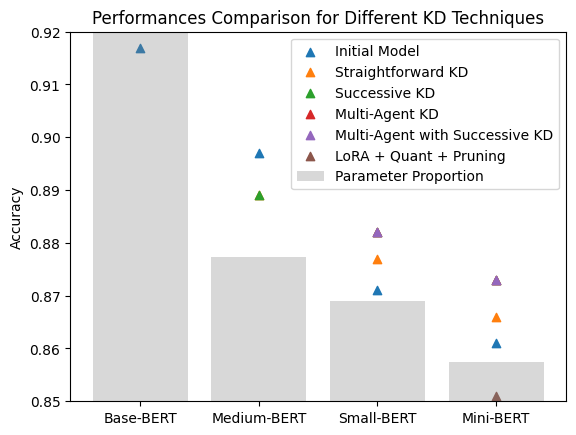

In [ ]:
for key in results.keys():
  plt.scatter([dico[i] for i in results[key]],results[key].values(),marker='^',label=key)
plt.bar([0,1,2,3],param_l,label='Parameter Proportion',alpha=0.3, color='grey')
plt.xticks([0,1,2,3],dico.keys())
plt.ylabel('Accuracy')
plt.ylim([0.85,0.92])
plt.title("Performances Comparison for Different KD Techniques")
plt.legend()